# Tugas Penambangan Data

# Tugas 1

Tugas mengukur jarak (dissimalirity)
1. ambil data dari kaggle/github
2. ukur jarak d(1,2) , d(1,3) , d(1,4) objek dari data tersebut

In [549]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [550]:
dataset_url = "https://raw.githubusercontent.com/IsmailGalangAdityawan/datamining/main/bands.csv"
data = pd.read_csv(dataset_url)

In [551]:
data.head()

,band,highest_pos,highest_pos_date,highest_song,danceSpeed,featuring_artist,highest_song_vid
0,NSYNC,1,2000-07-29,It's Gonna Be Me,pop,no,https://www.youtube.com/watch?v=GQMlWwIXg3M
1,112,4,2001-07-07,Peaches And Cream,pop,no,https://www.youtube.com/watch?v=wl2NCXzg1FQ
2,2gether,87,2000-09-09,The Hardest Part of Breaking Up,pop,no,https://www.youtube.com/watch?v=HJ89lMXLJGA
3,5 Seconds of Summer,16,2014-07-19,Amnesia,slow,no,https://www.youtube.com/watch?v=DCCJCILiX3o
4,5ive,10,1998-08-01,When The Lights Go Out,pop,no,https://www.youtube.com/watch?v=mpdcKmaHk_s


In [552]:
number_of_columns = data.shape[1]

In [553]:
pd.set_option('display.max_columns', number_of_columns)
pd.set_option('display.max_rows', number_of_columns)

In [554]:
data.columns

Index(['band', 'highest_pos', 'highest_pos_date', 'highest_song', 'danceSpeed',
       'featuring_artist', 'highest_song_vid'],
      dtype='object')

## **Categorical/Nomimal Features**

danceSpeed

featuring_artist



In [555]:
data[["band","danceSpeed", "featuring_artist"]].head(5)

,band,danceSpeed,featuring_artist
0,NSYNC,pop,no
1,112,pop,no
2,2gether,pop,no
3,5 Seconds of Summer,slow,no
4,5ive,pop,no


## Change Values to 1/0
## Take all values of 'danceSpeed' and 'featuring_artist'

If values is pop and yes change to 1

If values is slow and no change to 0


In [556]:
# danceSpeed code
code_danceSpeed_for_pop= "pop"
code_danceSpeed_for_slow = "slow"
#featuring_artist code
code_featuring_artist_for_yes= "Yes"
code_featuring_artist_for_no = "No"
# binary value
value_of_one = 1
value_of_zero = 0

def change_code_danceSpeed_to_biner(danceSpeed):
    return value_of_one if danceSpeed == code_danceSpeed_for_pop else value_of_zero

def change_code_featuring_artist_to_biner(featuring_artist):
    return value_of_one if featuring_artist == code_featuring_artist_for_yes else value_of_zero

In [557]:
# Update all values of 'danceSpeed' series
data["danceSpeed"] = data["danceSpeed"].apply(change_code_danceSpeed_to_biner)

# Update all values of 'featuring_artist' series
data["featuring_artist"] = data["featuring_artist"].apply(change_code_featuring_artist_to_biner)

In [558]:
data[["band","danceSpeed", "featuring_artist"]].head(5)

,band,danceSpeed,featuring_artist
0,NSYNC,1,0
1,112,1,0
2,2gether,1,0
3,5 Seconds of Summer,0,0
4,5ive,1,0


In [559]:
# CONSTAN VARIABLE
DECREMENT_BY_ONE = 1
INCREMENT_BY_ONE = 1

CONTINGENCY_TABLE_VALUE = {
    "q" : (1,1),
    "r" : (1,0),
    "s" : (0,1),
    "t" : (0,0),
}

In [560]:
def get_series(data, idx, series):
    return data.loc[(idx), series]

In [561]:
def get_dissimilarity_dataset(data, series_index = [], series = []):
    first_series = get_series(data, series_index[0], series)
    second_series = get_series(data, series_index[1], series)
    dataset = pd.concat([first_series,second_series],axis=1)
    return dataset.T

In [562]:
get_dissimilarity_dataset(data, [1,2], ["danceSpeed", "featuring_artist"]).T

,1,2
danceSpeed,1,1
featuring_artist,0,0


In [563]:
data.loc[0:5, ["danceSpeed", "featuring_artist"]]

,danceSpeed,featuring_artist
0,1,0
1,1,0
2,1,0
3,0,0
4,1,0
5,1,0


In [564]:
def count_contingency_value(data, start_index = 0, last_index = 1):

    CONTINGENCY_VALUE = {
        "q" : 0,
        "r" : 0,
        "s" : 0,
        "t" : 0,
    }

    column_range = data.shape[1]

    for column in range(column_range):
        for value in CONTINGENCY_TABLE_VALUE:
            item = list((tuple(data.loc[(start_index):(last_index), data.columns[column]]) == CONTINGENCY_TABLE_VALUE[value], value))
            if item[0] == True:
                if item[1] == "q":
                    CONTINGENCY_VALUE["q"] += 1
                if item[1] == "r":
                    CONTINGENCY_VALUE["r"] += 1
                if item[1] == "s":
                    CONTINGENCY_VALUE["s"] += 1
                if item[1] == "t":
                    CONTINGENCY_VALUE["t"] += 1

    return CONTINGENCY_VALUE

In [565]:
# d(1,2)
data_1_2 = get_dissimilarity_dataset(data, [1,2], ["danceSpeed", "featuring_artist"])

In [566]:
c_d_1_2 = count_contingency_value(data_1_2, 1, 2)

In [567]:
# d(1,3)
data_1_3 = get_dissimilarity_dataset(data, [1,3], ["danceSpeed", "featuring_artist"])

In [568]:
c_d_1_3 = count_contingency_value(data_1_3, 1, 3)

In [569]:
# d(1,4)
data_1_4 = get_dissimilarity_dataset(data, [1,4], ["danceSpeed", "featuring_artist"])

In [570]:
c_d_1_4 = count_contingency_value(data_1_4, 1, 4)

## **Dissimilarity Binary Assymetric Value Formula**
$$
\frac{r + s}{q + r + s}\
$$


In [571]:
def measure_dissimilarity_binary_value_assymetric_distance(contingency_value):

    return (contingency_value["r"] + contingency_value["s"]) / (contingency_value["q"] + contingency_value["r"] + contingency_value["s"])

In [572]:
d_1_2 = measure_dissimilarity_binary_value_assymetric_distance(c_d_1_2)
d_1_3 = measure_dissimilarity_binary_value_assymetric_distance(c_d_1_3)
d_1_4 = measure_dissimilarity_binary_value_assymetric_distance(c_d_1_4)

In [573]:
d_1_2

0.0

In [574]:
d_1_3

1.0

In [575]:
d_1_4

0.0

# Tugas 2

- Carilah data yang bertipe numerik ( data klassifikasi)
- Lakukan proses diskritisasi dengan equal width dan equal frequency
- Lakukan proses diskritisasi dengan basis entropy
- Kumpulkan tugas dengan link github ( web statis dari jupyter book)

In [576]:
import pandas as pd

In [577]:
# source data
dataset_url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
data = pd.read_csv(dataset_url)

In [578]:
data.head(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
...,...,...,...,...,...
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [579]:
# CONSTAN SERIES

SEPAL_LENGTH_SERIES = data["sepal.length"]
SEPAL_WIDTH_SERIES = data["sepal.width"]
PETAL_LENGTH_SERIES = data["petal.length"]
PETAL_WIDTH_SERIES = data["petal.width"]

## Hitung Data
### Definisi discretization
1. Proses mengubah data bertipe data numeric menjadi data bertipe categorical
2. Diskritisasi memiliki 2 pendekatan yaitu equal-width intervals dan equal-frequency intervals
3. equal-width intervals adalah diskritisasi dengan lebar data yang sama
4. equal-frequency intervals adalah diskritisasi dengan jumlah data yang sama



## Cut

* Cut adalah sebuah *method* pada library *pandas* untuk melakukan perhitungan *equal width frequency intervals*


```
# Syntax
pd.cut(series, interval, right=True, label)
```


## Sepal Width
- Equal Width Intervals lebar kelopak bunga Iris
- Dikelompokkan menjadi 3 kategori yaitu
- Kategori sedikit lebar
- Kategori lebar
- Kategori sangat lebar

In [580]:
# equal-width intervals

labels = ["sedikit_lebar", "lebar", "sangat_lebar"]
amount_of_binning = len(labels)

sepal_width_ew_binning = pd.cut(SEPAL_WIDTH_SERIES, amount_of_binning, True, labels)
labelled_sepal_width_ew_binning = sepal_width_ew_binning.value_counts()
interval_sepal_width_ew_binning = pd.cut(SEPAL_WIDTH_SERIES, amount_of_binning, True).value_counts()

In [581]:
# dataframe of sepal-width and sepal category
data_sepal_width_ew = pd.DataFrame(pd.concat((SEPAL_WIDTH_SERIES, sepal_width_ew_binning), axis=1))

In [582]:
# change columns name
data_sepal_width_ew.columns = ["sepal.width", "category"]

In [583]:
data_sepal_width_ew

,sepal.width,category
0,3.5,lebar
1,3.0,lebar
2,3.2,lebar
...,...,...
147,3.0,lebar
148,3.4,lebar
149,3.0,lebar


In [584]:
# equal-width intervals binning with label
labelled_sepal_width_ew_binning

lebar            88
sedikit_lebar    47
sangat_lebar     15
Name: sepal.width, dtype: int64

In [585]:
# equal-width intervals without label
interval_sepal_width_ew_binning

(2.8, 3.6]      88
(1.998, 2.8]    47
(3.6, 4.4]      15
Name: sepal.width, dtype: int64

## Petal Width
- Equal Width Intervals lebar mahkota bunga Iris
- Dikelompokkan menjadi 3 kategori yaitu
- Kategori sedikit lebar
- Kategori lebar
- Kategori sangat lebar

In [586]:
# equal-width intervals
labels = ["sedikit_lebar", "lebar", "sangat_lebar"]
amount_of_binning = len(labels)

petal_width_ew_binning = pd.cut(PETAL_WIDTH_SERIES, amount_of_binning, True, labels)
labelled_petal_width_ew_binning = petal_width_ew_binning.value_counts()
interval_petal_width_ew_binning = pd.cut(PETAL_WIDTH_SERIES, amount_of_binning, True).value_counts()

In [587]:
# dataframe of petal-width and petal category
data_petal_width = pd.DataFrame(pd.concat((PETAL_WIDTH_SERIES, petal_width_ew_binning), axis=1))

In [588]:
# change columns name
data_petal_width.columns = ["petal.width", "category"]

In [589]:
data_petal_width

,petal.width,category
0,0.2,sedikit_lebar
1,0.2,sedikit_lebar
2,0.2,sedikit_lebar
...,...,...
147,2.0,sangat_lebar
148,2.3,sangat_lebar
149,1.8,sangat_lebar


In [590]:
# equal-width intervals with label
labelled_petal_width_ew_binning

lebar            54
sedikit_lebar    50
sangat_lebar     46
Name: petal.width, dtype: int64

In [591]:
# equal-width intervals without label
interval_petal_width_ew_binning

(0.9, 1.7]       54
(0.0976, 0.9]    50
(1.7, 2.5]       46
Name: petal.width, dtype: int64

## Sepal Length
- Equal Width Intervals panjang kelopak bunga Iris
- Dikelompokkan menjadi 3 kategori yaitu
- Kategori sedikit lebar
- Kategori lebar
- Kategori sangat lebar

In [592]:
# equal-width intervals

labels = ["sedikit_lebar", "lebar", "sangat_lebar"]
amount_of_binning = len(labels)

sepal_length_ew_binning = pd.cut(SEPAL_LENGTH_SERIES, amount_of_binning, True, labels)
labelled_sepal_length_ew_binning = sepal_length_ew_binning.value_counts()
interval_sepal_length_ew_binning = pd.cut(SEPAL_LENGTH_SERIES, amount_of_binning, True).value_counts()

In [593]:
# dataframe of sepal-width and sepal category
data_sepal_length_ew = pd.DataFrame(pd.concat((SEPAL_LENGTH_SERIES, sepal_length_ew_binning), axis=1))

In [594]:
# change columns name
data_sepal_length_ew.columns = ["sepal_length", "category"]

In [595]:
data_sepal_length_ew

,sepal_length,category
0,5.1,sedikit_lebar
1,4.9,sedikit_lebar
2,4.7,sedikit_lebar
...,...,...
147,6.5,lebar
148,6.2,lebar
149,5.9,lebar


In [596]:
# equal-width intervals with label
labelled_sepal_length_ew_binning

lebar            71
sedikit_lebar    59
sangat_lebar     20
Name: sepal.length, dtype: int64

In [597]:
# equal-width intervals without label
interval_sepal_length_ew_binning

(5.5, 6.7]      71
(4.296, 5.5]    59
(6.7, 7.9]      20
Name: sepal.length, dtype: int64

## Petal Length
- Equal Width Intervals panjang mahkota bunga Iris
- Dikelompokkan menjadi 3 kategori yaitu
- Kategori sedikit lebar
- Kategori lebar
- Kategori sangat lebar

In [598]:
# equal-width intervals
labels = ["sedikit_lebar", "lebar", "sangat_lebar"]
amount_of_binning = len(labels)

petal_length_ew_binning = pd.cut(PETAL_LENGTH_SERIES, amount_of_binning, True, labels)
labelled_petal_length_ew_binning = petal_length_ew_binning.value_counts()
interval_petal_length_ew_binning = pd.cut(PETAL_LENGTH_SERIES, amount_of_binning, True).value_counts()

In [599]:
# dataframe of petal-width and petal category
data_petal_length_ew =  pd.DataFrame(pd.concat((PETAL_LENGTH_SERIES,petal_length_ew_binning), axis=1))

In [600]:
# change columns name
data_petal_length_ew.columns = ["petal_length", "category"]

In [601]:
data_petal_length_ew

,petal_length,category
0,1.4,sedikit_lebar
1,1.4,sedikit_lebar
2,1.3,sedikit_lebar
...,...,...
147,5.2,sangat_lebar
148,5.4,sangat_lebar
149,5.1,sangat_lebar


In [602]:
# equal-width intervals binning with label
labelled_petal_length_ew_binning

lebar            54
sedikit_lebar    50
sangat_lebar     46
Name: petal.length, dtype: int64

In [603]:
# equal-width intervals out label
interval_petal_length_ew_binning

(2.967, 4.933]    54
(0.994, 2.967]    50
(4.933, 6.9]      46
Name: petal.length, dtype: int64

## Qcut
Qcut adalah sebuah method pada library pandas untuk melakukan perhitungan equal frequency intervals

```
# Syntax
pd.qcut(series, interval, label)
```

## Sepal Width
- Equal Frequency Intervals lebar kelopak bunga Iris
- Dikelompokkan menjadi 3 kategori yaitu
- Kategori sedikit lebar
- Kategori lebar
- Kategori sangat lebar

In [604]:
# equal-frequency intervals

labels = ["sedikit_lebar", "lebar", "sangat_lebar"]
amount_of_binning = len(labels)

sepal_width_ef_binning = pd.qcut(SEPAL_WIDTH_SERIES, amount_of_binning, labels)
labelled_sepal_width_ef_binning = sepal_width_ef_binning.value_counts()
interval_sepal_width_ef_binning = pd.qcut(SEPAL_WIDTH_SERIES, amount_of_binning).value_counts()

In [605]:
# dataframe of sepal-width and sepal category
data_sepal_width_ef = pd.DataFrame(pd.concat((SEPAL_WIDTH_SERIES, sepal_width_ef_binning), axis = 1))

In [606]:
# change columns name
data_sepal_width_ef.columns = ["sepal_width", "category"]

In [607]:
data_sepal_width_ef

,sepal_width,category
0,3.5,sangat_lebar
1,3.0,lebar
2,3.2,lebar
...,...,...
147,3.0,lebar
148,3.4,sangat_lebar
149,3.0,lebar


In [608]:
# equal-frequency intervals binning with label
labelled_sepal_width_ef_binning

sedikit_lebar    57
lebar            50
sangat_lebar     43
Name: sepal.width, dtype: int64

In [609]:
# equal-frequency intervals out label
interval_sepal_width_ef_binning

(1.999, 2.9]    57
(2.9, 3.2]      50
(3.2, 4.4]      43
Name: sepal.width, dtype: int64

## Petal Width
- Equal Frequency Intervals lebar mahkota bunga Iris
- Dikelompokkan menjadi 3 kategori yaitu
- Kategori sedikit lebar
- Kategori lebar
- Kategori sangat lebar

In [610]:
# equal-frequency intervals

labels = ["sedikit_lebar", "lebar", "sangat_lebar"]
amount_of_binning = len(labels)

petal_width_ef_binning = pd.qcut(PETAL_WIDTH_SERIES, amount_of_binning, labels)
labelled_petal_width_ef_binning = petal_width_ef_binning.value_counts()
interval_petal_width_ef_binning = pd.qcut(PETAL_WIDTH_SERIES, amount_of_binning).value_counts()

In [611]:
# dataframe of petal-width and petal category
data_petal_width_ef = pd.DataFrame(pd.concat((PETAL_WIDTH_SERIES, petal_width_ef_binning), axis = 1))

In [612]:
# change columns name
data_petal_width_ef.columns = ["petal_width", "category"]

In [613]:
data_petal_width_ef

,petal_width,category
0,0.2,sedikit_lebar
1,0.2,sedikit_lebar
2,0.2,sedikit_lebar
...,...,...
147,2.0,sangat_lebar
148,2.3,sangat_lebar
149,1.8,sangat_lebar


In [614]:
# equal-frequency intervals binning with label
labelled_petal_width_ef_binning

lebar            52
sedikit_lebar    50
sangat_lebar     48
Name: petal.width, dtype: int64

In [615]:
# equal-frequency intervals without label
interval_petal_width_ef_binning

(0.867, 1.6]      52
(0.099, 0.867]    50
(1.6, 2.5]        48
Name: petal.width, dtype: int64

## Sepal Length
- Equal Frequency Intervals panjang kelopak bunga Iris
- Dikelompokkan menjadi 3 kategori yaitu
- Kategori sedikit lebar
- Kategori lebar
- Kategori sangat lebar

In [616]:
# equal-frequency intervals

labels = ["sedikit_lebar", "lebar", "sangat_lebar"]
amount_of_binning = len(labels)

sepal_length_ef_binning = pd.qcut(SEPAL_LENGTH_SERIES, amount_of_binning, labels)
labelled_sepal_length_ef_binning = sepal_length_ef_binning.value_counts()
interval_sepal_length_ef_binning = pd.qcut(SEPAL_LENGTH_SERIES, amount_of_binning).value_counts()

In [617]:
# dataframe of sepal-length and sepal category
data_sepal_length_ef = pd.DataFrame(pd.concat((SEPAL_LENGTH_SERIES, sepal_length_ef_binning), axis=1))

In [618]:
# change columns name
data_sepal_length_ef.columns = ["sepal_length", "category"]

In [619]:
data_sepal_length_ef

,sepal_length,category
0,5.1,sedikit_lebar
1,4.9,sedikit_lebar
2,4.7,sedikit_lebar
...,...,...
147,6.5,sangat_lebar
148,6.2,lebar
149,5.9,lebar


In [620]:
# equal-frequency intervals binning with label
labelled_sepal_length_ef_binning

lebar            56
sedikit_lebar    52
sangat_lebar     42
Name: sepal.length, dtype: int64

In [621]:
# equal-frequency intervals out label
interval_sepal_length_ef_binning

(5.4, 6.3]                   56
(4.2989999999999995, 5.4]    52
(6.3, 7.9]                   42
Name: sepal.length, dtype: int64

## Petal Length
- Equal Frequency Intervals panjang mahkota bunga Iris
- Dikelompokkan menjadi 3 kategori yaitu
- Kategori sedikit lebar
- Kategori lebar
- Kategori sangat lebar

In [622]:
# equal-frequency intervals

labels = ["sedikit_lebar", "lebar", "sangat_lebar"]
amount_of_binning = len(labels)

petal_length_ef_binning = pd.qcut(PETAL_LENGTH_SERIES, amount_of_binning, labels)
labelled_petal_length_ef_binning = petal_length_ef_binning.value_counts()
interval_petal_length_ef_binning = pd.qcut(PETAL_LENGTH_SERIES, amount_of_binning).value_counts()

In [623]:
# dataframe of petal-length and petal category
data_petal_length_ef = pd.DataFrame(pd.concat((PETAL_LENGTH_SERIES, petal_length_ef_binning), axis=1))

In [624]:
# change columns name
data_petal_length_ef.columns = ["petal_length", "category"]

In [625]:
data_petal_length_ef

,petal_length,category
0,1.4,sedikit_lebar
1,1.4,sedikit_lebar
2,1.3,sedikit_lebar
...,...,...
147,5.2,sangat_lebar
148,5.4,sangat_lebar
149,5.1,sangat_lebar


In [626]:
# equal-frequency intervals binning with label
labelled_petal_length_ef_binning

lebar            54
sedikit_lebar    50
sangat_lebar     46
Name: petal.length, dtype: int64

In [627]:
# equal-frequency intervals out label
interval_petal_length_ef_binning

(2.633, 4.9]      54
(0.999, 2.633]    50
(4.9, 6.9]        46
Name: petal.length, dtype: int64

### Definisi Entropy-based Binning

1.   Metode untuk mengelompokkan data *numeric* menjadi *categorical*
2.   Pengelompokkan dengan mencari jumlah pembagi yang terabaik
3.   Hasil pengelompokkan terbaik adalah dengan *entropy gain* yang paling besar


*  Rumus Entropy

$$
\begin{align*}
\displaystyle Entropy(S) &= \sum_{i=0}^{k} -pi \ log_{2} \ pi \\
\end{align*}
$$



#### Persiapan


*   Impor modul log2 dari *package math*
*   Ambil data yang akan digunakan


```
# dataframe about petal width (Equeal Frequency Interval)
df_petal_width_ef
```

*  Tentukan label


```
labels = ["sedikit_lebar", "lebar", "sangat_lebar"]
```



In [628]:
# module to calculate log
from math import log2

In [629]:
# dataframe
target_data = data_petal_width_ef
target_data

,petal_width,category
0,0.2,sedikit_lebar
1,0.2,sedikit_lebar
2,0.2,sedikit_lebar
...,...,...
147,2.0,sangat_lebar
148,2.3,sangat_lebar
149,1.8,sangat_lebar


In [630]:
# category label
labels = ["sedikit_lebar", "lebar", "sangat_lebar"]

## Functions
Fungsi menghitung banyaknya data setiap kategori

In [631]:
# count every value based the given category
def countEveryCategory(data_column, labels, column, category):
    group = data_column.groupby(category).count()
    amount_of_every_category = []
    for label in labels:
        amount_of_every_category.append(group.loc[label, column])
    return amount_of_every_category

Fungsi menghitung banyaknya data setiap kategori berdasarkan nilai pembagi atau split value yang diberikan

In [632]:
# split the given data based on category and split value 
def split(split_value, data_column, labels, col, category):
    less_group = data_column[data_column[col] < split_value]
    greater_group = data_column[data_column[col] >= split_value]
    
    length_less_group = countEveryCategory(less_group, labels, col, category)
    length_greater_group = countEveryCategory(greater_group, labels, col, category)
    
    return (length_less_group, length_greater_group)

Fungsi menghitung perbedaan *gain* antara entropi inisial dengan entropi nilai pembagi yang diberikan




---
$$Gain(E_{new}) = (E_{initial}) \ - (E_{new})$$
---



In [633]:
# count information gain from inisial entropy and new entropy
def count_gain(inisial_entropy, new_entropy):
  return inisial_entropy - new_entropy

Fungsi menghitung entropy

In [634]:
# count entropy
def count_entropy(data_target):
    all_prob = []
    for prob in data_target:
        if (prob/sum(data_target) != 0):
            all_prob.append(prob/sum(data_target) * log2(prob/sum(data_target)))
        else:
            all_prob.append(0)
    return -(sum(all_prob))

Fungsi menghitung Info entropy berdasarkan nilai pembagi atau *split value* yang diberikan


---



$$ Info_A(D) = \frac{|D_1|}{|D|} Entropy (D_1)\frac{|D_2|}{|D|}+ Entropy (D_2)$$

In [635]:
# count entropy for given a split value
def info(d, data_target):
    temp = []
    for value in d:
        temp.append((sum(value) / data_target.shape[0]) * count_entropy(value))
    return sum(temp)

## Implementasi
- Hitung target entropy
- Hitung target entropy dengan split value
- Hitung entropy gain

In [636]:
# entropy data target
initial_data_target_entropy = count_entropy(countEveryCategory(target_data, labels, target_data.columns[0], target_data.columns[1]))

In [637]:
# count Entropy for the target given a split value, split value = 0.7
entropy_data_target_1 = info(split(0.7, target_data, labels, target_data.columns[0], target_data.columns[1]), target_data)

In [638]:
# information gain (entropy data target and entropy_data_target_1)
count_gain(initial_data_target_entropy, entropy_data_target_1)

0.9182958340544896

# Tugas 3

## Implemetasi K-NN Pada datase Iris

In [639]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [640]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
data = pd.read_csv(url)


In [641]:
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


Memisahkan Features dan Label

In [642]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 4].values

Membagi data latih dan uji

In [643]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=10)

Label endcoding

In [644]:
lb = LabelEncoder()
lb.fit(y_train)

y_train = lb.transform(y_train)
y_test = lb.transform(y_test)

Standarisasi

Algoritma KNN menggunakan metrik jarak (Euclidean), sehingga memiliki data yang terdistribusi merata khususnya pada distribusi normal akan meningkatkan performa model KNN ini. Maka dari itu diperlukan proses standarisasi data.




In [645]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Menentukan nilai konstanta K

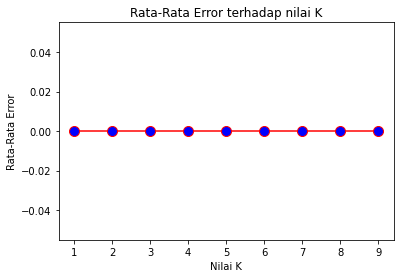

In [646]:
error = []

for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)

    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure()
plt.plot(range(1, 10), error, color='red', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Rata-Rata Error terhadap nilai K')
plt.xlabel('Nilai K')
plt.ylabel('Rata-Rata Error')
plt.show()

Training

Menggunakan  nilai Konstanta K=4

In [647]:
classifier = KNeighborsClassifier(n_neighbors=4)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

Evaluation

Mengecek akurasi model yang dibuat

In [648]:
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred, target_names=lb.classes_))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00        10
   Virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Tugas 4

In [649]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


In [650]:
url = 'https://raw.githubusercontent.com/IsmailGalangAdityawan/datamining/main/Iris.csv'
iris = pd.read_csv(url)

In [651]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [652]:
iris.drop(columns="Id",inplace=True)

In [653]:
x=iris.iloc[:,0:4].values
y=iris.iloc[:,4].values

In [654]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_true = le.fit_transform(y)

In [655]:
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

#Model Select
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.naive_bayes import GaussianNB

In [656]:
#Train and Test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [657]:
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
Y_pred = gaussian.predict(x_test) 
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
accuracy_Naive Bayes: 1.000
precision_Naive Bayes: 1.000
recall_Naive Bayes: 1.000
f1-score_Naive Bayes : 1.000


# Tugas 5

K-Means


In [658]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/IsmailGalangAdityawan/datamining/main/Iris.csv'
columns = ['sepal-length','sepal-width','petal-length','petal-width','class']
data = pd.read_csv(url)

In [659]:
data.drop(columns='Id',inplace=True)

In [660]:
x = data.values[:, 0:4]
y = data.values[:,4]

In [661]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
label = le.fit_transform(y)

In [662]:
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [663]:
dfkelas = pd.DataFrame(label, columns=['class'])

In [664]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_new = pca.fit_transform(x)

In [665]:
x_new

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456],
       [-2.27989736,  0.74778271],
       [-2.82089068, -0.08210451],
       [-2.62648199,  0.17040535],
       [-2.88795857, -0.57079803],
       [-2.67384469, -0.1066917 ],
       [-2.50652679,  0.65193501],
       [-2.61314272,  0.02152063],
       [-2.78743398, -0.22774019],
       [-3.22520045, -0.50327991],
       [-2.64354322,  1.1861949 ],
       [-2.38386932,  1.34475434],
       [-2.6225262 ,  0.81808967],
       [-2.64832273,  0.31913667],
       [-2.19907796,  0.87924409],
       [-2.58734619,  0.52047364],
       [-2.3105317 ,  0.39786782],
       [-2.54323491,  0.44003175],
       [-3.21585769,  0.14161557],
       [-2.30312854,  0.10552268],
       [-2.35617109, -0.03120959],
       [-2.50791723, -0.13905634],
       [-2.469056  ,  0.13788731],
       [-2.56239095,  0.37468456],
       [-2.63982127,

In [666]:
from sklearn.cluster import KMeans
#number of cluster
kmeans = KMeans = KMeans(n_clusters=3)
#fitting the input data
kmeans= kmeans.fit(x_new)
#getting the clusters  labels
prediksi = kmeans.predict(x_new)
#centroids values
centroids = kmeans.cluster_centers_

In [667]:
centroids

array([[ 0.66443351, -0.33029221],
       [-2.64084076,  0.19051995],
       [ 2.34645113,  0.27235455]])

In [668]:
x_new[:,1:12].shape

(150, 1)

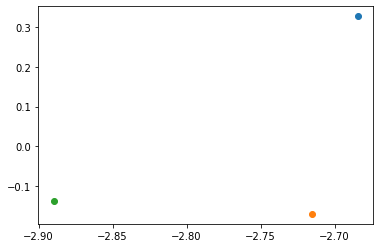

In [669]:
from numpy import unique
from matplotlib import pyplot
from numpy import where 
yhat = unique(prediksi)
clusters = unique(yhat)
#create scatter plot for samples from each cluster
for cluster in clusters:
  #get row indexes for samples with this cluster
  row_ix = where (yhat == cluster)
  #create scatter of these samples
  pyplot.scatter(x_new[row_ix,0],x_new[row_ix,1])
#show the plot
pyplot.show()

In [670]:
a=prediksi
mapping = {1:0, 0:1, 2:2}
a = [mapping[i] for i in a]

In [671]:
prediksi = np.array(a)
prediksi

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [672]:
from sklearn.metrics import accuracy_score

In [673]:
accuracy_score(label,prediksi)

0.8866666666666667

In [674]:
type(x_new[row_ix, 0])

numpy.ndarray

In [675]:
x_new[row_ix,0]

array([[-2.88981954]])

In [676]:
x[row_ix,1]

array([[3.2]], dtype=object)

In [677]:
yhat

array([0, 1, 2], dtype=int32)

# Tugas 6

Decision Tree

In [678]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import tree
import seaborn as sns

url = 'https://raw.githubusercontent.com/IsmailGalangAdityawan/datamining/main/Iris.csv'
data = pd.read_csv(url)

In [679]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
...,...,...,...,...,...,...
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [680]:
y = data["Species"]
X = data.drop(columns=["Species"])
clf = tree.DecisionTreeClassifier(criterion="gini")
clf = clf.fit(X, y)

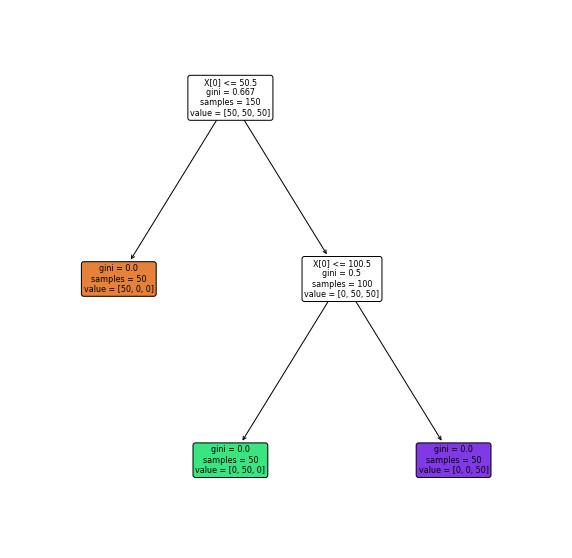

In [681]:
#plt the figure, setting a black background
plt.figure(figsize=(10,10))
#create the tree plot
a = tree.plot_tree(clf,
                   rounded = True,
                   filled = True,
                   fontsize=8)
#show the plot
plt.show()

# UTS

Lakukan analisa terhadap data pada  https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra  dengan menggunakan klasifikasi

- metode Naive Bayes Classifier

- metode pohon keputusan (Desision tree)

Proses analisa dilaporkan dan diupload di github ( menggunakan jupyter book)

2. Decision Tree
Decision Tree (Pohon keputusan) adalah jenis pembelajaran mesin terawasi(supervise) yang digunakan untuk mengkategorikan atau membuat prediksi berdasarkan bagaimana serangkaian pertanyaan sebelumnya dijawab. Supervise artinya model dilatih dan diuji pada sekumpulan data yang berisi kategorisasi yang diinginkan.

In [682]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import tree
import seaborn as sns

url = 'https://raw.githubusercontent.com/IsmailGalangAdityawan/datamining/main/dataR2.csv'
data = pd.read_csv(url)

In [683]:
data

,Age,BMI,Glucose,...,Resistin,MCP.1,Classification
0,48,23.500000,70,...,7.99585,417.114,1
1,83,20.690495,92,...,4.06405,468.786,1
2,82,23.124670,91,...,9.27715,554.697,1
...,...,...,...,...,...,...,...
113,65,32.050000,97,...,10.33000,314.050,2
114,72,25.590000,82,...,3.27000,392.460,2
115,86,27.180000,138,...,4.35000,90.090,2


In [684]:
y = data["Classification"]
X = data.drop(columns=["Classification"])
clf = tree.DecisionTreeClassifier(criterion="gini")
clf = clf.fit(X, y)

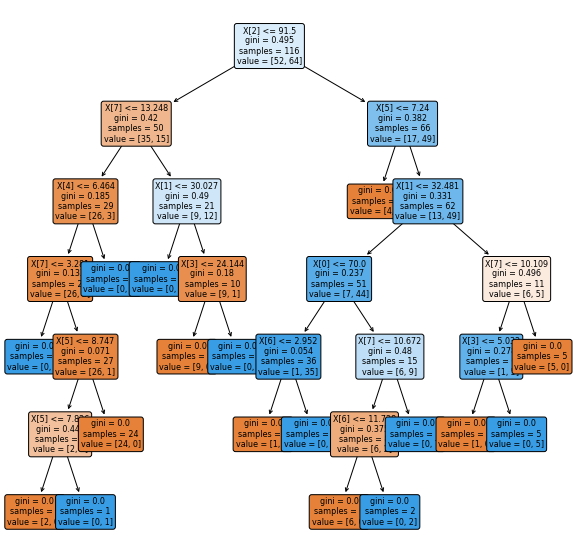

In [685]:
#plt the figure, setting a black background
plt.figure(figsize=(10,10))
#create the tree plot
a = tree.plot_tree(clf,
                   rounded = True,
                   filled = True,
                   fontsize=8)
#show the plot
plt.show()